# 序言

## 北京第三区交通委提醒您：道路千万条，安全第一条。行车不规范，亲人两行泪。

# 加载数据

相信通过序言，大家已经基本了解了这是一个怎样的数据集，它记录了从2012年到2019年在大城市纽约发生的1454053起交通事故。

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import os
import warnings; warnings.filterwarnings(action='once')




#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)
#设置value的显示长度为50
pd.set_option('max_colwidth',50)

data=pd.read_csv('../input/nypd-motor-vehicle-collisions.csv')

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
data.head(3)

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2019-03-02T00:00:00,0:00,BRONX,10466,40.893390,-73.857376,"{'longitude': '-73.857376', 'latitude': '40.89...",WHITE PLAINS ROAD,EAST 233 STREET,NaN,0.0,0.0,0,0,0,0,0,0,Unsafe Speed,Unspecified,NaN,NaN,NaN,4090610,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
1,2019-03-02T00:00:00,0:00,BRONX,10469,40.870290,-73.843180,"{'longitude': '-73.84318', 'latitude': '40.870...",KNAPP STREET,EASTCHESTER ROAD,NaN,0.0,0.0,0,0,0,0,0,0,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,4090611,Sedan,Sedan,NaN,NaN,NaN
2,2019-03-02T00:00:00,0:00,BROOKLYN,11206,40.705185,-73.939430,"{'longitude': '-73.93943', 'latitude': '40.705...",NaN,NaN,330 BUSHWICK AVENUE,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,4090424,Sedan,Sedan,NaN,NaN,NaN


In [3]:
print(len(data))
data.describe()

1454053


,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,UNIQUE KEY
count,1.270228e+06,1.270228e+06,1.454036e+06,1.454023e+06,1.454053e+06,1.454053e+06,1.454053e+06,1.454053e+06,1.454053e+06,1.454053e+06,1.454053e+06
mean,4.069419e+01,-7.387917e+01,2.591497e-01,1.165731e-03,5.109374e-02,6.361529e-04,2.037202e-02,7.840154e-05,1.878473e-01,4.539037e-04,2.629027e+06
std,1.096644e+00,2.307962e+00,6.572027e-01,3.615833e-02,2.330119e-01,2.586039e-02,1.424281e-01,8.931457e-03,6.188808e-01,2.321588e-02,1.509801e+06
min,0.000000e+00,-2.013600e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01
25%,4.066860e+01,-7.397812e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.040390e+05
50%,4.072258e+01,-7.393082e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.363147e+06
75%,4.076761e+01,-7.386769e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.726816e+06
max,4.334444e+01,0.000000e+00,4.300000e+01,8.000000e+00,2.700000e+01,6.000000e+00,4.000000e+00,2.000000e+00,4.300000e+01,5.000000e+00,4.091199e+06


# 缺失值处理

In [4]:
def null_count(data):  # 定义 null 值查找函数，函数名 null_count
    null_data = data.isnull().sum()  # 查找各个特征 null 值并计算数量
    null_data = null_data.drop(null_data[null_data == 0].index).sort_values(
        ascending=False)  # 删除数目为零的特征，降序排列
    return null_data  # 返回结果

null_count(data)  # 调用 null_count 函数统计 data 的 null，输出结果

CONTRIBUTING FACTOR VEHICLE 5    1449104
VEHICLE TYPE CODE 5              1443984
CONTRIBUTING FACTOR VEHICLE 4    1434621
VEHICLE TYPE CODE 4              1406737
CONTRIBUTING FACTOR VEHICLE 3    1360497
VEHICLE TYPE CODE 3              1330916
OFF STREET NAME                  1268414
CROSS STREET NAME                 459795
ZIP CODE                          433567
BOROUGH                           433393
ON STREET NAME                    277780
VEHICLE TYPE CODE 2               233721
CONTRIBUTING FACTOR VEHICLE 2     192872
LOCATION                          183825
LONGITUDE                         183825
LATITUDE                          183825
VEHICLE TYPE CODE 1                 4500
CONTRIBUTING FACTOR VEHICLE 1       3750
NUMBER OF PERSONS KILLED              30
NUMBER OF PERSONS INJURED             17
dtype: int64

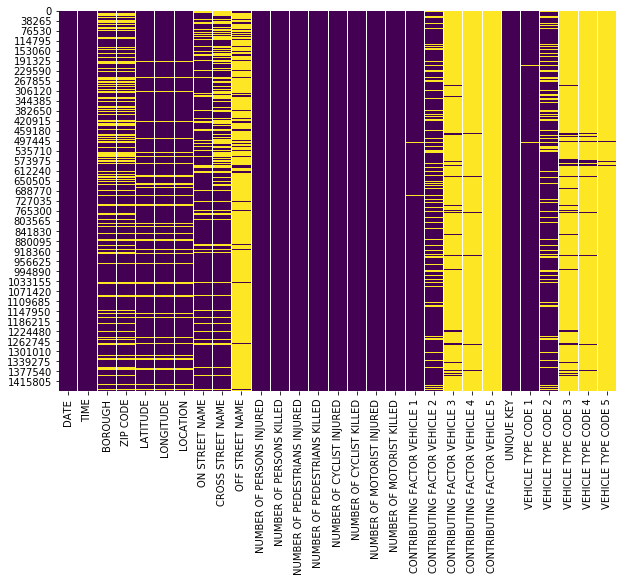

In [5]:
plt.figure(figsize=(10,7))
sns.heatmap(data.isnull(), cbar = False, cmap = 'viridis')

可以看到，缺失值主要分布在一些附加信息的特征中，尤其是第三四五辆机动车的信息几乎全部为缺失值，这说明大型多辆机动车的交通事故占极少数

由于这是一个交通事故的统计数据，因此若记录的某些数据没有对事故损失的具体描述，既几项关键信息数据的记录均为缺失值，那么这些数据就是没有意义的数据，这些关键信息的缺失不仅给计算造成了负担，也会影响我们后续的分析。
该数据集的关键信息即为伤亡信息的数据，我们按照这些条件进行查找看是否存在无意义的数据或统计错误的数据。

In [6]:
data[(data['NUMBER OF PERSONS INJURED'].isnull().values==True)&(data['NUMBER OF PERSONS KILLED'].isnull().values==True)&\
     (data['NUMBER OF PEDESTRIANS INJURED'].isnull().values==True)&(data['NUMBER OF PEDESTRIANS KILLED'].isnull().values==True)&\
     (data['NUMBER OF CYCLIST INJURED'].isnull().values==True)&(data['NUMBER OF CYCLIST KILLED'].isnull().values==True)&\
     (data['NUMBER OF MOTORIST INJURED'].isnull().values==True)&(data['NUMBER OF MOTORIST KILLED'].isnull().values==True)].head()#查看各类受伤或死亡人数为空值的数据信息

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5


根据上面的查询结果，可以看出虽然某些伤亡人数信息存在缺失值，但并不存在这些信息均为缺失值的数据，也就是说某些信息记录的某类伤亡人数为缺失值值等价与该事故造成的该类伤亡人数为0，说明该数据集中的每条数据对事故的关键信息都是存在一定记录的，我们只需要小改就可以。

In [7]:
data[(data['CONTRIBUTING FACTOR VEHICLE 3'].isnull().values==True)&\
     ((data['CONTRIBUTING FACTOR VEHICLE 4'].notnull().values==True)|(data['CONTRIBUTING FACTOR VEHICLE 5'].notnull().values==True))].head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5


我们注意到该数据集对每起事故的肇事车辆预设的最大登记数为5,但大部分肇事车辆数都达不到5,因此对肇事车辆的信息记录的位置会存在很多缺失值，接下来我们查看是否存在跳跃记录的情况，既不按照表格顺序填写肇事车辆信息

In [8]:
data[(data['CONTRIBUTING FACTOR VEHICLE 3'].isnull().values==True)&\
     ((data['CONTRIBUTING FACTOR VEHICLE 4'].notnull().values==True)|(data['CONTRIBUTING FACTOR VEHICLE 5'].notnull().values==True))].head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5


上面的结果可以看出，在第三辆肇事车辆数据为空值的情况下，第四辆和第五辆也均为空值，这说明该数据集对肇事车辆的统计确实是按照表格顺序填写的，因此我们可以根据第三辆肇事车辆数据是否为空值判断肇事车辆是否不少于三辆

通过以上分析，我们得出结论，除了死伤人数及经纬度信息外，其他列的空值都是文字信息，且基本都是按照正常的逻辑填写，对我们稍后的分析不会产生影响，因此为了尽可能还原数据的特征，我们暂时不做处理。

对于死伤人数及经纬度信息的缺失值。我们将死伤人数的空值替换为`0`,经纬度的空值替换为`U`。

In [9]:
data['NUMBER OF PERSONS INJURED'].fillna(0,inplace=True) 
data['NUMBER OF PERSONS KILLED'].fillna(0,inplace=True) 
data['LATITUDE'].fillna('U',inplace=True) 
data['LONGITUDE'].fillna('U',inplace=True) 

处理完伤亡人数的缺失值以后，我们可以额外补充一列死伤人数之和的特征。

In [10]:
data['NUMBER OF PERSONS INFLUENCED'] = data['NUMBER OF PERSONS INJURED'] + data['NUMBER OF PERSONS KILLED']

# 地理因素分析

接下来我们对事故发生的地理位置进行分析，由于该数据集结构清晰信息简炼，所以我们只需要将该数据集中的重要信息表现在地图上即可。

In [11]:
location = data['LOCATION'].value_counts()

count_loc = pd.DataFrame({"LOCATION" : location.index, "ValueCount":location})
count_loc.index = range(len(location))
count_loc.head()

loc = data.groupby('LOCATION').first()

new_loc = loc.loc[:, ['LATITUDE', 'LONGITUDE', 'ZIP CODE', 'ON STREET NAME', 'BOROUGH']]
new_loc.head()

,LATITUDE,LONGITUDE,ZIP CODE,ON STREET NAME,BOROUGH
LOCATION,,,,,
"{'longitude': '-201.23706', 'latitude': '40.75837', 'needs_recoding': False}",40.758370,-201.237060,NaN,QUEENSBORO BRIDGE UPPER ROADWAY,NaN
"{'longitude': '-201.35999', 'latitude': '40.854286', 'needs_recoding': False}",40.854286,-201.359990,NaN,HUTCHINSON RIVER PARKWAY,NaN
"{'longitude': '-32.768513', 'latitude': '40.665226', 'needs_recoding': False}",40.665226,-32.768513,NaN,NASSAU EXPRESSWAY,NaN
"{'longitude': '-47.209625', 'latitude': '40.556175', 'needs_recoding': False}",40.556175,-47.209625,NaN,WEST SHORE EXPRESSWAY,NaN
"{'longitude': '-73.66301', 'latitude': '40.739876', 'needs_recoding': False}",40.739876,-73.663010,NaN,Dyckman Ave,NaN


我们首先利用`LOCATION`变量对每个地点的事故发生次数进行统计生成了新数据集`count_loc`，然后在原来的数据集上对特征进行了筛选重新组成了一个新的数据集new_loc，该数据集是对每一个事故地点的地理特征信息的记录。

接下来我们将这两个数据集合并成一个新数据集`the_loc`，该数据集既包含事故发生地点的地理特征信息，又标明了每个地点的事故发生次数。

In [12]:
the_loc = pd.merge(count_loc,new_loc,on='LOCATION')
the_loc.drop(the_loc.index[0], inplace=True)
the_loc.head()

,LOCATION,ValueCount,LATITUDE,LONGITUDE,ZIP CODE,ON STREET NAME,BOROUGH
1,"{'longitude': '-74.038086', 'latitude': '40.60...",670,40.608757,-74.038086,NaN,VERRAZANO BRIDGE LOWER,NaN
2,"{'longitude': '-73.9845292', 'latitude': '40.6...",586,40.696035,-73.984529,11201,FLATBUSH AVENUE EXTENSION,BROOKLYN
3,"{'longitude': '-73.9643142', 'latitude': '40.7...",473,40.760601,-73.964314,10022,EAST 59 STREET,MANHATTAN
4,"{'longitude': '-73.82744', 'latitude': '40.798...",462,40.798256,-73.827440,NaN,BRONX WHITESTONE BRIDGE,NaN
5,"{'longitude': '-73.9897922', 'latitude': '40.7...",455,40.757232,-73.989792,10036,WEST 42 STREET,MANHATTAN


可以看到该数据集总体的结构非常清晰。

由于原始数据是对12年到19年的所有交通事故的记录，共145万起交通事故，因此若将这些事故地点全部标记到地图上是不美观且没有意义的，数据分析的最终目的是寻求规律，因此我们仅将事故最高发的200个地点在地图上标记并打上标签（额外附上的两张图是最高发的2000个地点的信息），其中标签含义如下：
- Lat : 纬度
- Lng : 经度
- ZIP CODE : 邮编
- ON STREET NAME : 附近街道名称
- BOROUGH : 行政区
- Incidents : 事故发生次数

In [13]:
nmap = folium.Map(location=[40.721757, -73.930529],
                        zoom_start=13)

for i in range(200):
    lat = the_loc.iloc[i][2]
    long = the_loc.iloc[i][3]
    radius = the_loc['ValueCount'].iloc[i] / 30
    
    if the_loc['ValueCount'].iloc[i] > 300:
        color = "#FF4500"
    else:
        color = "#008080"
    
    popup_text = """Lat : {}<br>
                Lng : {}<br>
                ZIP CODE : {}<br>
                ON STREET NAME : {}<br>
                BOROUGH : {}<br>
                Incidents : {}<br>"""
    popup_text = popup_text.format(the_loc['LATITUDE'].iloc[i],
                               the_loc['LONGITUDE'].iloc[i],
                               the_loc['ZIP CODE'].iloc[i],
                               the_loc['ON STREET NAME'].iloc[i],
                               the_loc['BOROUGH'].iloc[i],
                               the_loc['ValueCount'].iloc[i]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text,radius = radius, color = color, fill = True).add_to(nmap)

In [14]:
nmap

![](https://upload-images.jianshu.io/upload_images/15406304-597df00ef17acc61.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

![](https://upload-images.jianshu.io/upload_images/15406304-9418bf2b6422779b.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

# 基于时间序列的综合分析

我们猜想，交通事故的发生频率与时间、人口甚至人文风气等因素都存在很大的关系，设想一下：在上下班时间，一个路口挤满了人，在阴天雨季，道路能见度低，路面湿滑，此时，一个熟悉的声音在耳畔响起

`北京第三区交通委再次提醒您：道路千万条，安全第一条。行车不规范，亲人两行泪`

可以看出，北京第三交通委非常关心大家，通过不厌其烦的提醒来唤起大家对交通安全的重视，这也从侧面反映了交通事故和当地的环境存在很大的联系，接下来我们先对纽约的五个行政区进行对比分析

## 行政区-时间序列分析

- 首先，我们利用`BOROUGH`和`date`这两个变量交叉组合对原来的数据集重新排序分类，并统计每一类的伤亡人数`NUMBER OF PERSONS INFLUENCED`之和，得到一个新的数据集`time_place_person`
- 然后，通过`BOROUGH`变量的五种不同的取值将一个数据集切分成五个平行的数据集`df1`到`df5`
- 由于这五个平行数据集拥有相同的时间序列标签`date`，因此我们利用`date`作为母结点，将五个平行的数据集重新合并成一个数据集`df`
- 五个平行数据集合并后，各自的维度`value`组成了五个平行的`value_行政区`，也就相当于我们将原始数据集中一维的 `value` 切分为了五个平行的维度 `value_行政区` 并重新映射到时间序列里

In [15]:
def get_date(DATE):
    date = DATE[:-12]
    return date

data['date'] = data['DATE'].apply(get_date)

In [16]:
time_place_person = data.groupby(by=['BOROUGH','date'])['NUMBER OF PERSONS INFLUENCED'].sum().unstack().reset_index().melt(id_vars='BOROUGH')
time_place_person.head()

,BOROUGH,date,value
0,BRONX,2012-07,552.0
1,BROOKLYN,2012-07,1349.0
2,MANHATTAN,2012-07,705.0
3,QUEENS,2012-07,914.0
4,STATEN ISLAND,2012-07,185.0


In [17]:
df1=time_place_person[time_place_person['BOROUGH']=='BRONX']
df1['value_BRONX']=df1['value']
df1.drop(columns=['value','BOROUGH'], inplace=True)

df2=time_place_person[time_place_person['BOROUGH']=='BROOKLYN']
df2['value_BROOKLYN']=df2['value']
df2.drop(columns=['value','BOROUGH'], inplace=True)

df3=time_place_person[time_place_person['BOROUGH']=='MANHATTAN']
df3['value_MANHATTAN']=df3['value']
df3.drop(columns=['value','BOROUGH'], inplace=True)

df4=time_place_person[time_place_person['BOROUGH']=='QUEENS']
df4['value_QUEENS']=df4['value']
df4.drop(columns=['value','BOROUGH'], inplace=True)

df5=time_place_person[time_place_person['BOROUGH']=='STATEN ISLAND']
df5['value_STATEN ISLAND']=df5['value']
df5.drop(columns=['value','BOROUGH'], inplace=True)


df_1 = pd.merge(df1,df2,on='date')
df_2 = pd.merge(df3,df4,on='date')
df_3 = pd.merge(df_1,df_2,on='date')
df = pd.merge(df5,df_3,on='date')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [18]:
df.drop(80, inplace=True)

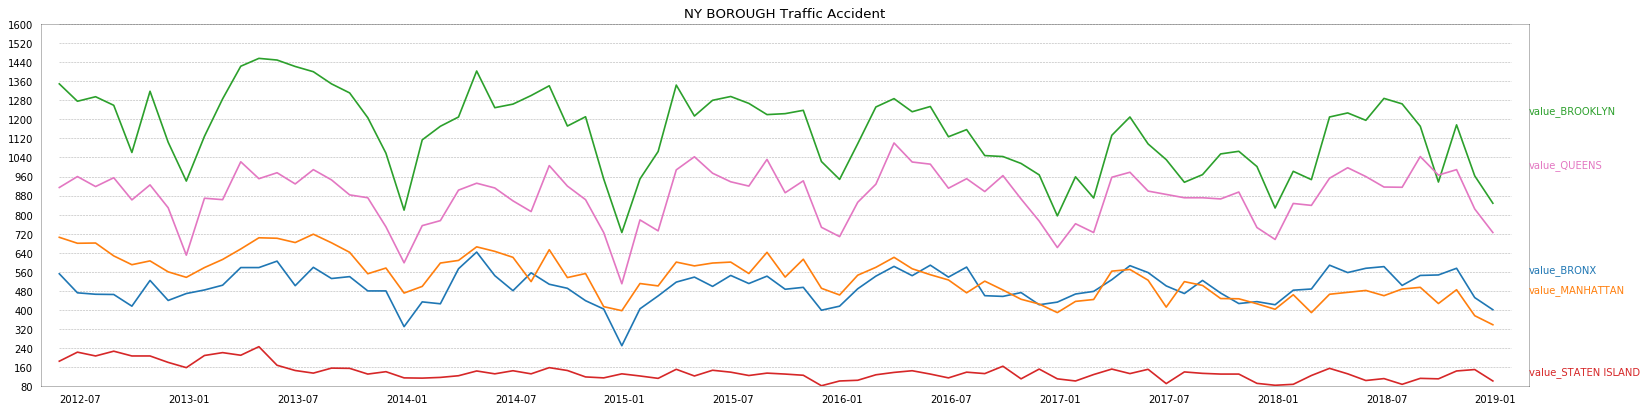

In [19]:
y_LL = 80
y_UL = int(df.iloc[:, 1:].max().max()*1.1)
y_interval = 80
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:pink']    

# Draw Plot and Annotate
fig, ax = plt.subplots(1,1,figsize=(24, 6), dpi= 80)    

columns = df.columns[1:]  
for i, column in enumerate(columns):
    plt.plot(df.date.values, df[column].values, lw=1.5, color=mycolors[i])    
    plt.text(df.shape[0]+1, df[column].values[-9], column, fontsize=9, color=mycolors[i])

# Draw Tick lines  
for y in range(y_LL, y_UL, y_interval):    
    plt.hlines(y, xmin=0, xmax=80, colors='black', alpha=0.3, linestyles="--", lw=0.5)

# Decorations    
plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True)        

# Lighten borders
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)

plt.title('NY BOROUGH Traffic Accident', fontsize=12)
plt.yticks(range(y_LL, y_UL, y_interval), [str(y) for y in range(y_LL, y_UL, y_interval)], fontsize=9)    
plt.xticks(range(0, df.shape[0], 6), df.date.values[::6], horizontalalignment='left', fontsize=9)    
plt.ylim(y_LL, y_UL)    
plt.xlim(-1, 81)    
plt.show()

可以看出，交通事故的发生具有一定的季节周期性和地域性

## 月、日、时-时间序列分析

In [20]:
def get_month(DATE):
    month = DATE[5:-12]
    return month

# def get_date(DATE):
    # date = DATE[:-12]
    # return date

def get_hour(TIME):
    hour = TIME[0:-3]
    return hour

In [21]:
data['month'] = data['DATE'].apply(get_month)
# data['date'] = data['DATE'].apply(get_date)
data['hour'] = data['TIME'].apply(get_hour)

In [22]:
date_statistics = data['date'].value_counts()
hour_statistics = data['hour'].value_counts()
month_statistics = data['month'].value_counts()



date_1 = pd.DataFrame({"date" : date_statistics.index, "statistics":date_statistics})
date_1.index = range(len(date_statistics))

hour_1 = pd.DataFrame({"hour" : hour_statistics.index, "statistics":hour_statistics})
hour_1.index = range(len(hour_statistics))

month_1 = pd.DataFrame({"month" : month_statistics.index, "statistics":month_statistics})
month_1.index = range(len(month_statistics))



date_1['index']=date_1['date']
month_1['index']=month_1['month']
hour_1['index']=hour_1['hour']



date_0 = date_1.groupby('index').first()
hour_0 = hour_1.groupby('index').first()
month_0 = month_1.groupby('index').first()

In [23]:
date_0.drop('2019-03', inplace=True)

hour_0['hour'][0] = '00'
hour_0['hour'][1] = '01'
hour_0['hour'][12] = '02'
hour_0['hour'][17] = '03'
hour_0['hour'][18] = '04'
hour_0['hour'][19] = '05'
hour_0['hour'][20] = '06'
hour_0['hour'][21] = '07'
hour_0['hour'][22] = '08'
hour_0['hour'][23] = '09'
hour_0['index']=hour_0['hour']
hour_0 = hour_0.groupby('index').first()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: 'index' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  


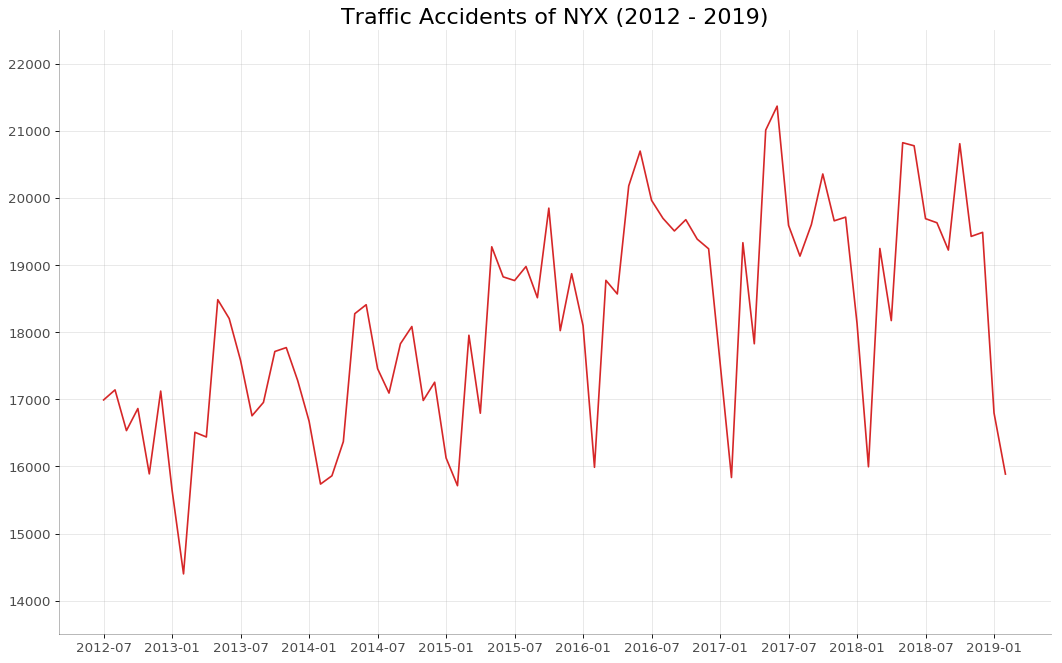

In [24]:
plt.figure(figsize=(16,10), dpi= 80)
plt.plot('date', 'statistics', data=date_0, color='tab:red')

plt.ylim(13500, 22500)
xtick_location = date_0['date'].tolist()[::6]
plt.xticks(xtick_location,xtick_location, rotation=0, fontsize=12, horizontalalignment='center', alpha=.7)
plt.yticks(fontsize=12, alpha=.7)
plt.title("Traffic Accidents of NYX (2012 - 2019)", fontsize=20)
plt.grid(axis='both', alpha=.3)

plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)   
plt.show()

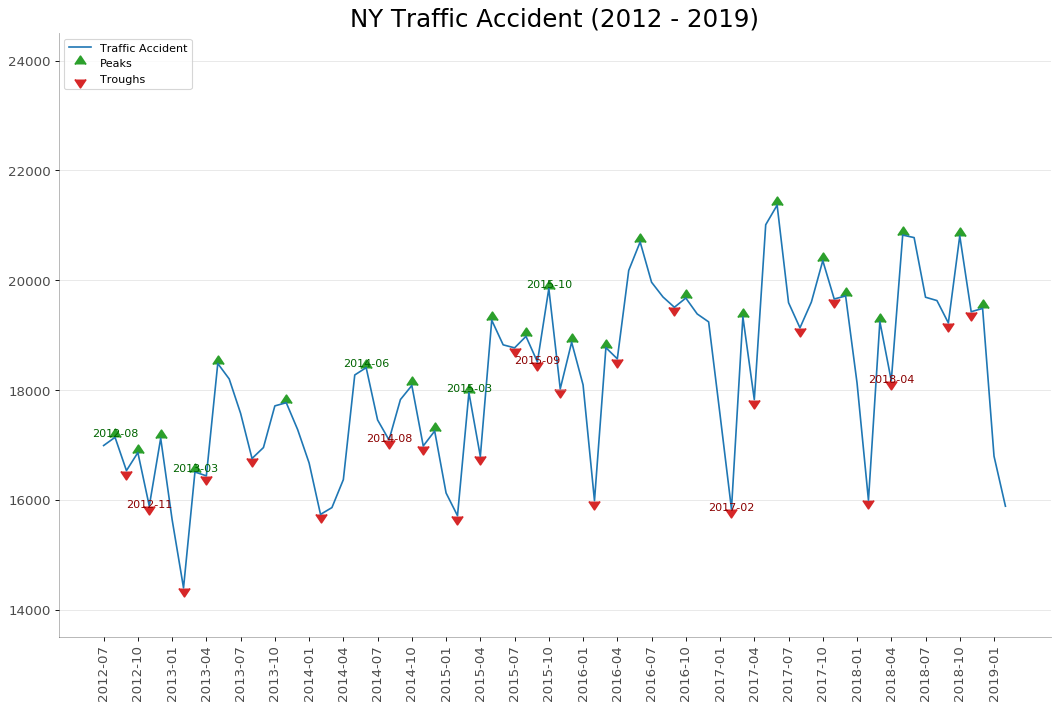

In [25]:
statistics_value = date_0['statistics'].values
doublediff = np.diff(np.sign(np.diff(statistics_value)))
peak_locations = np.where(doublediff == -2)[0] + 1

doublediff2 = np.diff(np.sign(np.diff(-1*statistics_value)))
trough_locations = np.where(doublediff2 == -2)[0] + 1


plt.figure(figsize=(16,10), dpi= 80)
plt.plot('date', 'statistics', data=date_0, color='tab:blue', label='Traffic Accident')
plt.scatter(date_0.date[peak_locations], date_0.statistics[peak_locations], marker=mpl.markers.CARETUPBASE, color='tab:green', s=100, label='Peaks')
plt.scatter(date_0.date[trough_locations], date_0.statistics[trough_locations], marker=mpl.markers.CARETDOWNBASE, color='tab:red', s=100, label='Troughs')


for t, p in zip(trough_locations[1::5], peak_locations[::3]):
    plt.text(date_0.date[p], date_0.statistics[p]+15, date_0.date[p], horizontalalignment='center', color='darkgreen')
    plt.text(date_0.date[t], date_0.statistics[t]-35, date_0.date[t], horizontalalignment='center', color='darkred')


plt.ylim(13500,24500)
xtick_location = date_0['date'].tolist()[::3]
xtick_labels = xtick_location
plt.xticks(xtick_location, xtick_labels, rotation=90, fontsize=12, alpha=.7)
plt.title("NY Traffic Accident (2012 - 2019)", fontsize=22)
plt.yticks(fontsize=12, alpha=.7)


plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.3)

plt.legend(loc='upper left')
plt.grid(axis='y', alpha=.3)
plt.show()

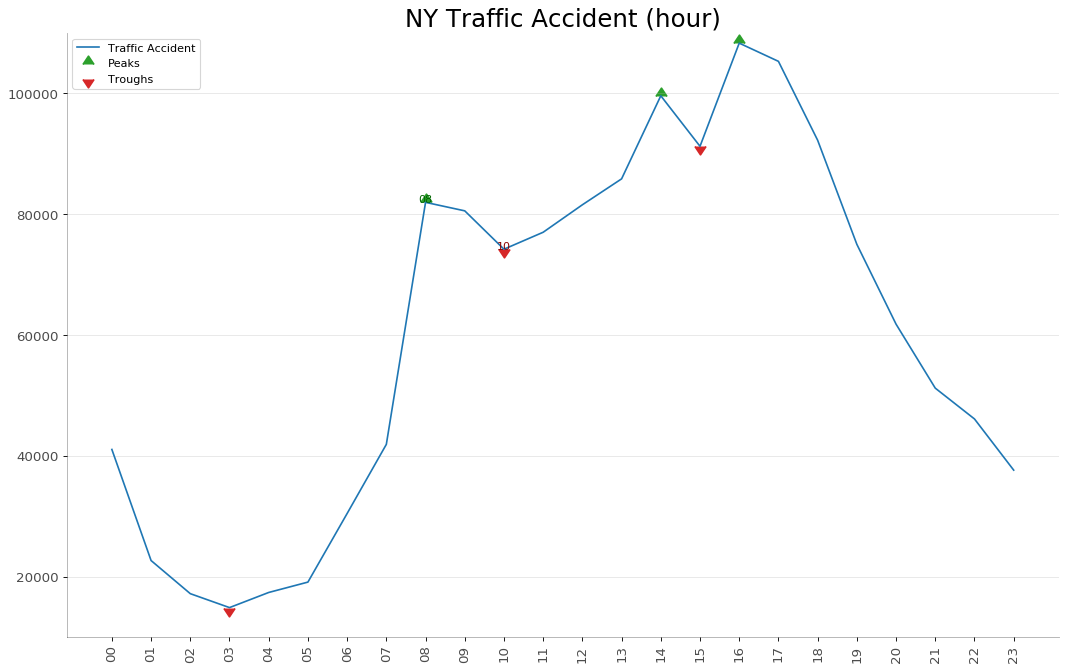

In [26]:
statistics_value = hour_0['statistics'].values
doublediff = np.diff(np.sign(np.diff(statistics_value)))
peak_locations = np.where(doublediff == -2)[0] + 1

doublediff2 = np.diff(np.sign(np.diff(-1*statistics_value)))
trough_locations = np.where(doublediff2 == -2)[0] + 1

# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
plt.plot('hour', 'statistics', data=hour_0, color='tab:blue', label='Traffic Accident')
plt.scatter(hour_0.hour[peak_locations], hour_0.statistics[peak_locations], marker=mpl.markers.CARETUPBASE, color='tab:green', s=100, label='Peaks')
plt.scatter(hour_0.hour[trough_locations], hour_0.statistics[trough_locations], marker=mpl.markers.CARETDOWNBASE, color='tab:red', s=100, label='Troughs')

# Annotate
for t, p in zip(trough_locations[1::5], peak_locations[::3]):
    plt.text(hour_0.hour[p], hour_0.statistics[p]+15, hour_0.hour[p], horizontalalignment='center', color='darkgreen')
    plt.text(hour_0.hour[t], hour_0.statistics[t]-35, hour_0.hour[t], horizontalalignment='center', color='darkred')

# Decoration
plt.ylim(10000,110000)
xtick_location = hour_0['hour'].tolist()[::1]
xtick_labels = xtick_location
plt.xticks(xtick_location, xtick_labels, rotation=90, fontsize=12, alpha=.7)
plt.title("NY Traffic Accident (hour)", fontsize=22)
plt.yticks(fontsize=12, alpha=.7)

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.3)

plt.legend(loc='upper left')
plt.grid(axis='y', alpha=.3)
plt.show()

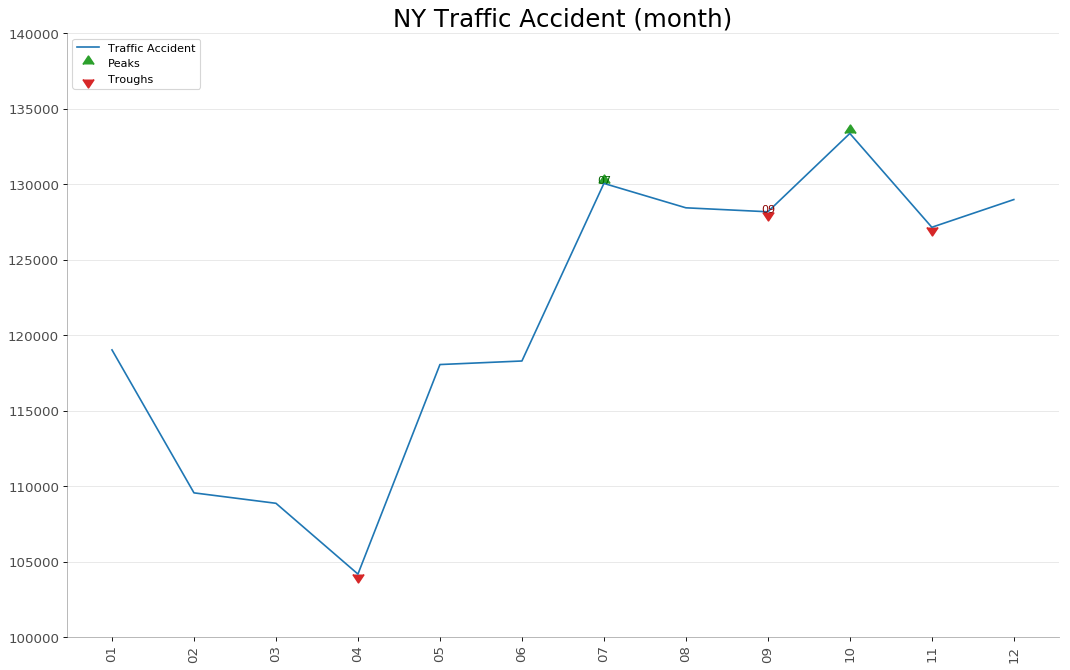

In [27]:
statistics_value = month_0['statistics'].values
doublediff = np.diff(np.sign(np.diff(statistics_value)))
peak_locations = np.where(doublediff == -2)[0] + 1

doublediff2 = np.diff(np.sign(np.diff(-1*statistics_value)))
trough_locations = np.where(doublediff2 == -2)[0] + 1

# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
plt.plot('month', 'statistics', data=month_0, color='tab:blue', label='Traffic Accident')
plt.scatter(month_0.month[peak_locations], month_0.statistics[peak_locations], marker=mpl.markers.CARETUPBASE, color='tab:green', s=100, label='Peaks')
plt.scatter(month_0.month[trough_locations], month_0.statistics[trough_locations], marker=mpl.markers.CARETDOWNBASE, color='tab:red', s=100, label='Troughs')

# Annotate
for t, p in zip(trough_locations[1::5], peak_locations[::3]):
    plt.text(month_0.month[p], month_0.statistics[p]+15, month_0.month[p], horizontalalignment='center', color='darkgreen')
    plt.text(month_0.month[t], month_0.statistics[t]-35, month_0.month[t], horizontalalignment='center', color='darkred')

# Decoration
plt.ylim(100000,140000)
xtick_location = month_0['month'].tolist()[::1]
xtick_labels = xtick_location
plt.xticks(xtick_location, xtick_labels, rotation=90, fontsize=12, alpha=.7)
plt.title("NY Traffic Accident (month)", fontsize=22)
plt.yticks(fontsize=12, alpha=.7)

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.3)

plt.legend(loc='upper left')
plt.grid(axis='y', alpha=.3)
plt.show()

## 时间序列分解图

下面我们将时间序列分解为趋势，季节和残差分量

/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


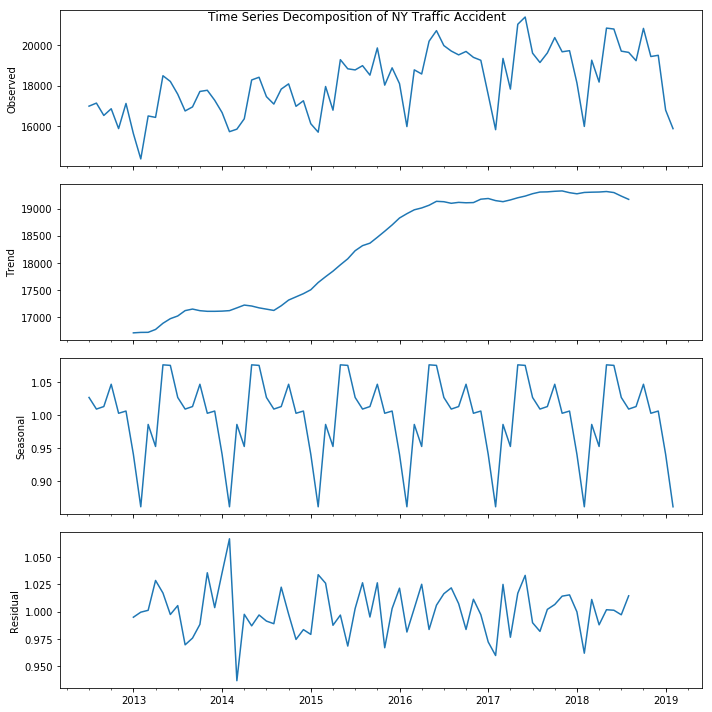

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Import Data
dates = pd.DatetimeIndex([parse(d).strftime('%Y-%m-01') for d in date_0['date']])
date_0.set_index(dates, inplace=True)

# Decompose 
result = seasonal_decompose(date_0['statistics'], model='multiplicative')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result.plot().suptitle('Time Series Decomposition of NY Traffic Accident')
plt.show()

## ACF和PACF自相关图

/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/opt/conda/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


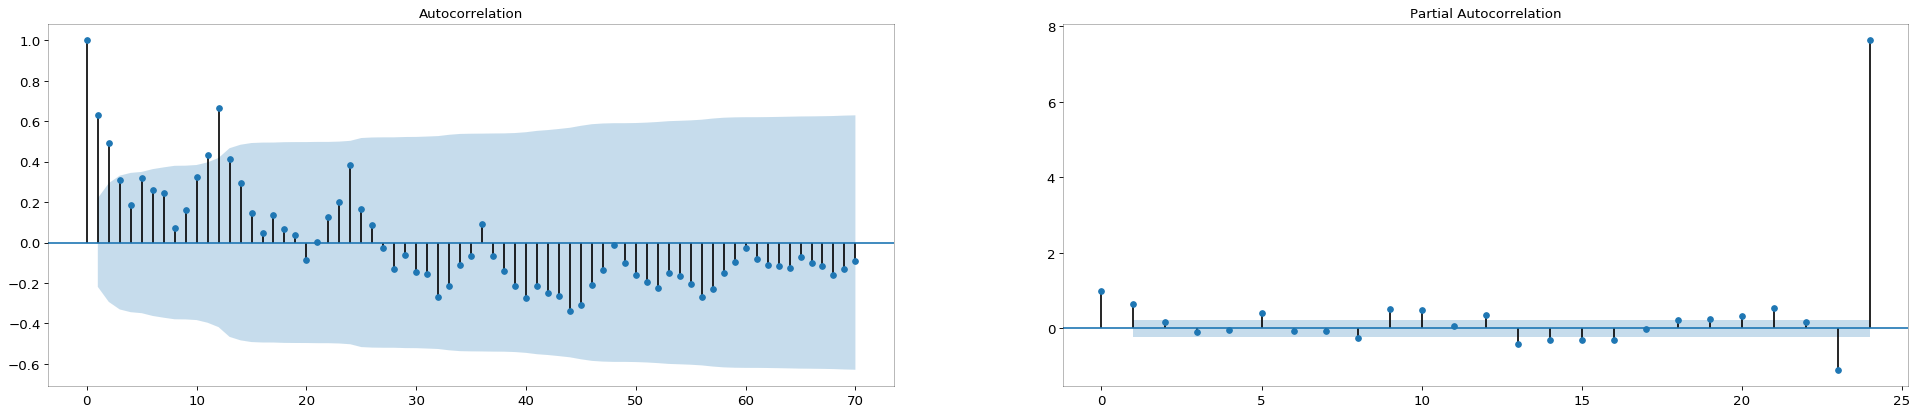

In [29]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(30,6), dpi= 80)
plot_acf(date_0.statistics.tolist(), ax=ax1, lags=70)
plot_pacf(date_0.statistics.tolist(), ax=ax2, lags=24)

# Decorate
# lighten the borders
ax1.spines["top"].set_alpha(.3); ax2.spines["top"].set_alpha(.3)
ax1.spines["bottom"].set_alpha(.3); ax2.spines["bottom"].set_alpha(.3)
ax1.spines["right"].set_alpha(.3); ax2.spines["right"].set_alpha(.3)
ax1.spines["left"].set_alpha(.3); ax2.spines["left"].set_alpha(.3)

# font size of tick labels
ax1.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='both', labelsize=12)
plt.show()

可以看到，自相关和偏自相关都是12阶拖尾，说明交通事故的发生频率具有非常明显的季节变动特征，可以用ARMA模型进行分析

# 用机器学习的方法填补缺失的BOROUGH标签

我们注意到原始的`data`数据中标签`BOROUGH`存在433393个缺失值，由于数据集给出了经纬度信息，因此我们可以考虑使用分类方法将标签补充完整。

In [30]:
train=data[(data['LATITUDE']!='U')&(data['LONGITUDE']!='U')&(data['BOROUGH'].notnull())]
test=data[(data['LATITUDE']!='U')&(data['LONGITUDE']!='U')&(data['BOROUGH'].isnull())]
U=data[(data['LATITUDE']=='U')|(data['LONGITUDE']=='U')]

这里定义U只是方便说明，这里的train、test和U加在一起即为原始的data数据集。由于U中的数据为经纬度为缺失值的数据，这类数据既不能作为训练集使用，也不能拿来做测试集，所以对后续分析没有任何作用

## 随机森林

In [31]:
from datetime import date
from sklearn.ensemble import RandomForestClassifier

cols = ['LATITUDE', 'LONGITUDE']

reg_ngk = RandomForestClassifier(random_state=100)
reg_ngk.fit(train[cols], train['BOROUGH'])

test['BOROUGH_RF'] = reg_ngk.predict(test[cols])

/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size ch

In [32]:
test.head(3)

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,NUMBER OF PERSONS INFLUENCED,date,month,hour,BOROUGH_RF
7,2019-03-02T00:00:00,0:00,NaN,NaN,40.7659,-73.9946,"{'longitude': '-73.99464', 'latitude': '40.765...",11 AVENUE,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4089894,Bike,Taxi,NaN,NaN,NaN,0.0,2019-03,03,0,MANHATTAN
9,2019-03-02T00:00:00,0:00,NaN,NaN,40.8708,-73.8812,"{'longitude': '-73.88115', 'latitude': '40.870...",MOSHOLU PARKWAY,MARION AVENUE,NaN,1.0,0.0,0,0,1,0,0,0,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,4089422,Station Wagon/Sport Utility Vehicle,Bike,NaN,NaN,NaN,1.0,2019-03,03,0,BRONX
12,2019-03-02T00:00:00,0:01,NaN,NaN,40.6899,-73.9515,"{'longitude': '-73.95147', 'latitude': '40.689...",NOSTRAND AVENUE,NaN,NaN,1.0,0.0,0,0,1,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,4089571,Station Wagon/Sport Utility Vehicle,Bike,NaN,NaN,NaN,1.0,2019-03,03,0,BROOKLYN


我们用随机森林的方法进行了分类并填补了缺失的BOROUGH标签，接下来我们将分类的结果表现在图像里。我们建立一个横轴为纬度，纵轴为经度的坐标系，用颜色区分行政区`BOROUGH`

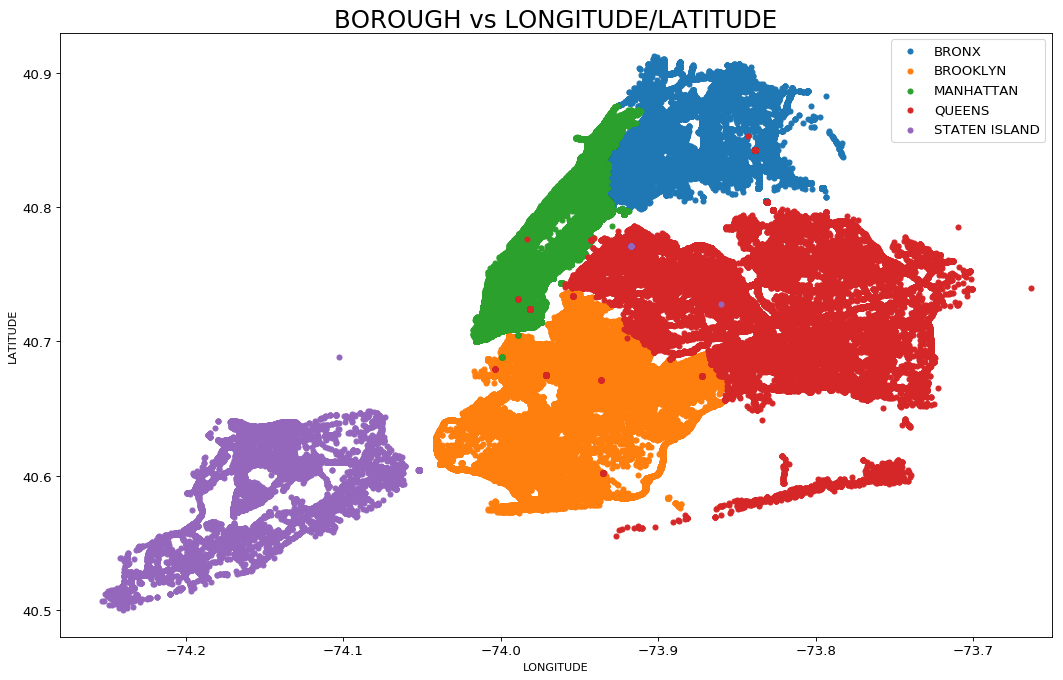

In [33]:
BOROUGHs = np.unique(test['BOROUGH_RF'])
colors = [plt.cm.tab10(i/float(len(BOROUGHs)-1)) for i in range(len(BOROUGHs))]

# Draw Plot for Each Category
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, BOROUGH_RF in enumerate(BOROUGHs):
    plt.scatter('LONGITUDE', 'LATITUDE', 
                data=test.loc[test.BOROUGH_RF==BOROUGH_RF, :], 
                s=20, cmap=colors[i], label=str(BOROUGH_RF))
    # "c=" 修改为 "cmap="

# Decorations
plt.gca().set(xlim=(-74.28, -73.65), ylim=(40.48, 40.93),
              xlabel='LONGITUDE', ylabel='LATITUDE')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("BOROUGH vs LONGITUDE/LATITUDE", fontsize=22)
plt.legend(fontsize=12)    
plt.show()    

![](https://upload-images.jianshu.io/upload_images/15406304-1f6129983dd54e62.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

可以看到，我们的分类结果非常好，随机森林做出的决策边界基本和纽约地图一模一样